In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

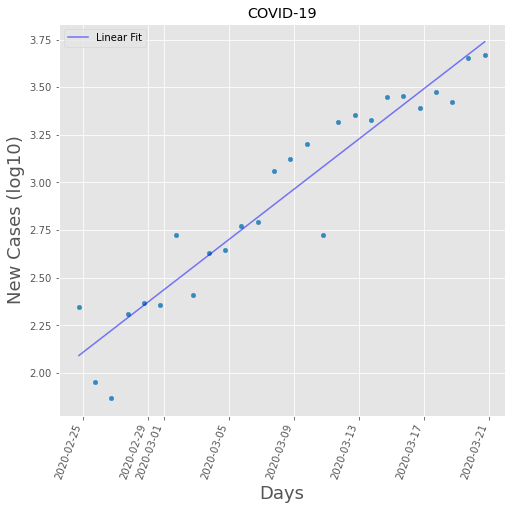

In [4]:
yR='nuovi_attualmente_positivi'
fig,ax=plt.subplots(figsize=(8,8))
df = pd.read_csv(os.path.join('dati-andamento-nazionale',
                               'dpc-covid19-ita-andamento-nazionale.csv'))
df.data = pd.to_datetime(df.data)
df[yR+'_log']=np.log10(df[yR])
df.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax)

x=df['data'].values.reshape(-1, 1)
y=df[yR+'_log'].values
lr.fit(x,y )
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(df.data.values.astype(float).reshape(-1, 1))
df['y_pred']=y_pred

df.plot(x='data',
         y='y_pred',
         ax=ax,c='b',alpha=0.5,label ='Linear Fit')
plt.xticks(rotation=70,ha='right')
plt.title('COVID-19')
plt.xlabel('Days', fontsize='18')
plt.ylabel('New Cases (log10)',fontsize='18')
plt.show()

In [5]:
future = pd.DataFrame()
future['day'] = pd.date_range(start='2020-03-21', end='2020-03-30')
future['log_pred'] = lr.predict(future.day.values.astype(float).reshape(-1, 1))
future['pred'] = 10**future['log_pred']
future

,day,log_pred,pred
0,2020-03-21,3.757440,5720.578378
1,2020-03-22,3.823423,6659.215814
2,2020-03-23,3.889406,7751.865690
3,2020-03-24,3.955389,9023.798500
4,2020-03-25,4.021373,10504.431143
5,2020-03-26,4.087356,12228.007267
6,2020-03-27,4.153339,14234.389249
7,2020-03-28,4.219322,16569.980117
8,2020-03-29,4.285305,19288.796750
9,2020-03-30,4.351288,22453.719161


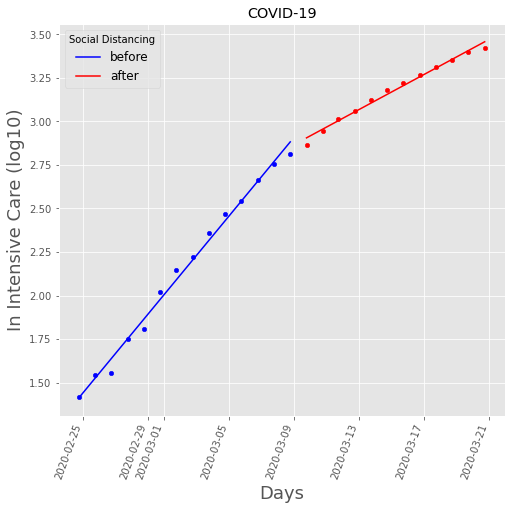

In [6]:
yR='terapia_intensiva'
df[yR+'_log']=np.log10(df[yR])
before = df[df['data']<'2020-03-9']
after = df[df['data']>'2020-03-9']

fig,ax=plt.subplots(figsize=(8,8))

before.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax,c='b')

after.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax,c='r')

x=before['data'].values.reshape(-1, 1)
y=before[yR+'_log'].values
lr.fit(x,y)
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(before.data.values.astype(float).reshape(-1, 1))
before.loc[:,'y_pred']=y_pred

before.plot(x='data',
         y='y_pred',
         ax=ax,c='b',label='before')

x=after['data'].values.reshape(-1, 1)
y=after[yR+'_log'].values
lr.fit(x,y )
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(after.data.values.astype(float).reshape(-1, 1))
after.loc[:,'y_pred']=y_pred

after.plot(x='data',
         y='y_pred',
         ax=ax,c='r',label='after')
plt.legend(title='Social Distancing',fontsize=12)
plt.xticks(rotation=70,ha='right')

plt.xlabel('Days', fontsize='18')
plt.ylabel('In Intensive Care (log10)',fontsize='18')
plt.title('COVID-19')
plt.savefig('COVID.png')

In [9]:
#!jupyter nbconvert --to html covid